# Simple Exponential Smoothing

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
# https://uncoolai.com/exponential-smoothing-for-time-series-forecasting/#Simple-Exponential-Smoothing

In [3]:
df = pd.read_csv('AirPassengers.csv', index_col="Month", parse_dates=True)

In [4]:
df.describe()

# count mean 70

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
train_data = df.iloc[:70]

In [6]:
train_data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1954-06-01,264
1954-07-01,302
1954-08-01,293


In [7]:
test_data = df.iloc[70:]

In [8]:
test_data

,#Passengers
Month,
1954-11-01,203
1954-12-01,229
1955-01-01,242
1955-02-01,233
1955-03-01,267
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


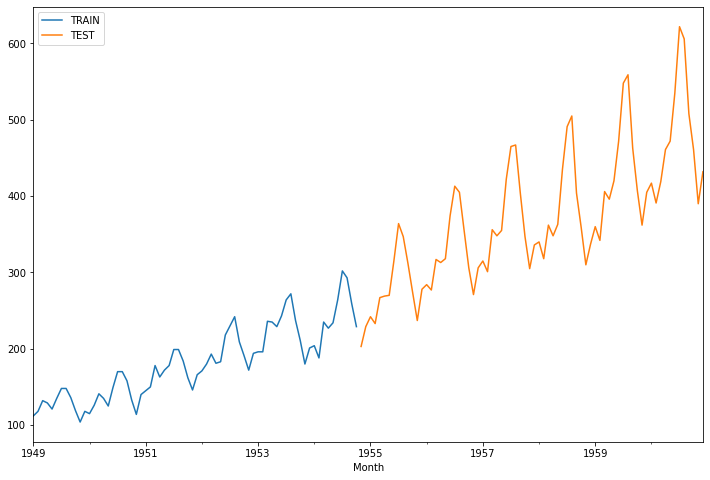

In [9]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

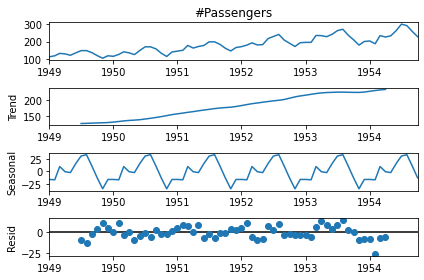

In [11]:
seasonal_decompose(train_data['#Passengers']).plot();

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [19]:
# span = 12 # The model will consider the last 12 months weighted average for forecasting
# alpha = 2/(span+1)
# model = SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=alpha)
# test_predictions = model.forecast(36).rename('SES Forecast')

In [20]:
span = 12 
alpha = 2/(span+1)

In [22]:
model = SimpleExpSmoothing(train_data['#Passengers']).fit(smoothing_level=alpha)

C:\Users\Zng\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Zng\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [23]:
test_predictions = model.forecast(36).rename('SES Forecast')

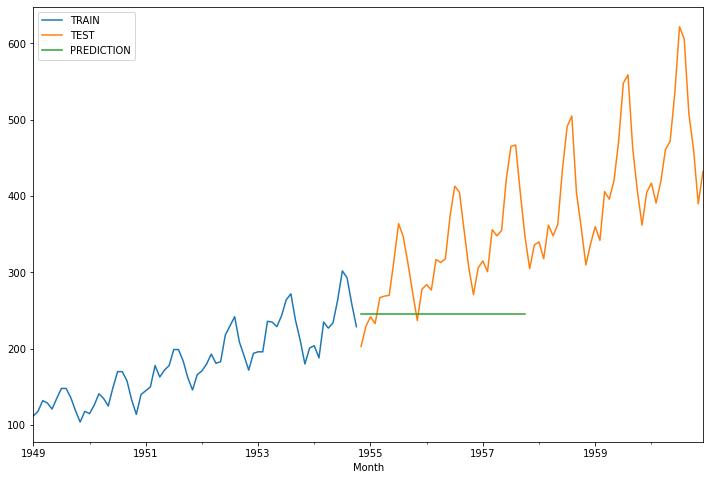

In [24]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [31]:
from sklearn.metrics import mean_squared_error

In [ ]:
rms_error = np.sqrt(mean_squared_error(test_data['#Passengers'],test_predictions))
print("RMS Error is ",rms_error)

In [25]:
################################################################################################################################

In [ ]:
https://uncoolai.com/exponential-smoothing-for-time-series-forecasting/#Simple-Exponential-Smoothing

# Double Exponential Smoothing

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
double_model = ExponentialSmoothing(train_data['#Passengers'],trend='add').fit()
test_predictions = double_model.forecast(36).rename('DES Forecast')

C:\Users\Zng\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Zng\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


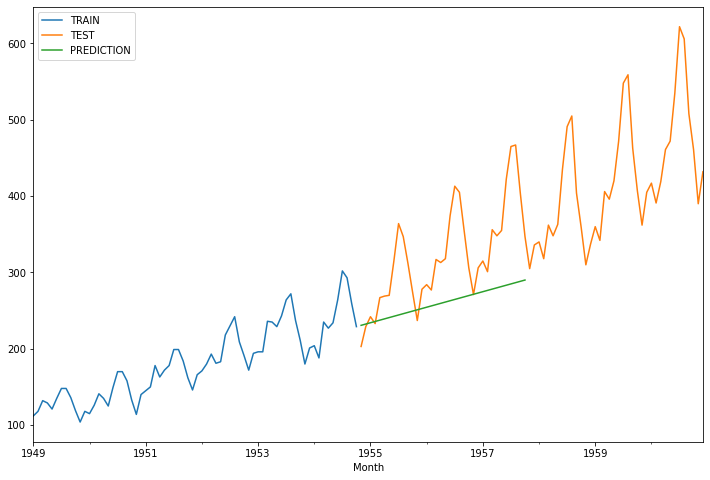

In [28]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [29]:
######################################################################################################

# Triple Exponential Smoothing

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model = ExponentialSmoothing(train_data['#Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = triple_model.forecast(36).rename('TES Forecast')

C:\Users\Zng\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Zng\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Zng\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Zng\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


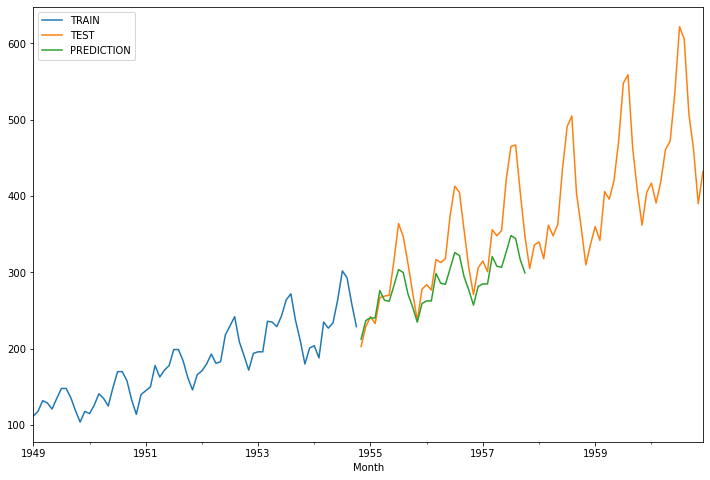

In [34]:
train_data['#Passengers'].plot(legend=True,label='TRAIN')
test_data['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [ ]:
rms_error = np.sqrt(mean_squared_error(test_data['#Passengers'],test_predictions))
print("RMS Error for TES is ",rms_error)